# Bigmart sales analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Variable Identification

In [2]:
train_df=pd.read_csv("E:/SMBA project/Dataset/Train.csv")
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
test_df=pd.read_csv("E:/SMBA project/Dataset/Test.csv")
test_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
for i in range(len(train_df.columns)): 
    print(train_df.columns[i]+"  "+str(train_df[train_df.columns[i]].nunique()))

Item_Identifier  1559
Item_Weight  415
Item_Fat_Content  5
Item_Visibility  7880
Item_Type  16
Item_MRP  5938
Outlet_Identifier  10
Outlet_Establishment_Year  9
Outlet_Size  3
Outlet_Location_Type  3
Outlet_Type  4
Item_Outlet_Sales  3493


In [7]:
categorical_variables=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [8]:
for i in categorical_variables:
    print("..............................")
    print(i)
    print("-------------")
    print(train_df[i].value_counts())

..............................
Item_Fat_Content
-------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
..............................
Item_Type
-------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
..............................
Outlet_Size
-------------
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
..............................
Outlet_Location_Type
-------------
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outle

# Missing Value Treatment

Filling missing values in Item weights as mean after it is grouped by Item identifier

In [9]:
mean_weight_df=train_df[['Item_Identifier', 'Item_Weight']].groupby(['Item_Identifier'], as_index=False).mean()
mean_weight_df

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [10]:
isnull_df=train_df["Item_Weight"].isnull()
isnull_df

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [12]:
for i in range(len(isnull_df)):
    if(isnull_df.iloc[i]):
        name=train_df["Item_Identifier"][i]
        value=mean_weight_df[mean_weight_df['Item_Identifier']==name].values[0][1]
        train_df["Item_Weight"][i]=value

C:\Users\vikrama\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8519 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
train_df["Item_Weight"]=train_df['Item_Weight'].fillna(0)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Filling missing values of outlet size with mode aftre grouping it based on outlet type

In [18]:
mode_outlet_size=train_df[['Outlet_Type', 'Outlet_Size']].groupby(['Outlet_Type'], as_index=False).agg(lambda x:x.value_counts().index[-1])
mode_outlet_size

,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,Medium
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [19]:
isnull_size=train_df["Outlet_Size"].isnull()
isnull_size

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [22]:
for i in range(len(isnull_size)):
    if(isnull_size.iloc[i]):
        name=train_df["Outlet_Type"][i]
        value=mode_outlet_size[mode_outlet_size['Outlet_Type']==name].values[0][1]
        train_df["Outlet_Size"][i]=value

C:\Users\vikrama\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Checking for zero in visibility

In [24]:
sum(train_df["Item_Visibility"]==0)

526

In [25]:
train_df['Item_Visibility']=train_df['Item_Visibility'].replace([0],[np.mean(train_df['Item_Visibility'])])

In [26]:
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

# Derived Variable

In [27]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
arr=[]
for i in range(len(train_df["Item_Identifier"])):
    arr.append(train_df["Item_Identifier"][i][0:2])
a=pd.DataFrame(arr)
a

,0
0,FD
1,DR
2,FD
3,FD
4,NC
...,...
8518,FD
8519,FD
8520,NC
8521,FD


In [29]:
train_df["New_Item_Type"] = a

In [30]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,FD
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD


In [31]:
train_df["New_Item_Type"].value_counts()

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [32]:
train_df["New_Item_Type"]=train_df["New_Item_Type"].replace({'FD':'Food','NC':'Non-consumable','DR':'Drinks'})

In [33]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food


In [34]:
b=[]
for i in range(len(train_df["Outlet_Establishment_Year"])):
    b.append(2013-train_df["Outlet_Establishment_Year"][i])
b=pd.DataFrame(b)

In [35]:
train_df["Age_of_Outlet"]=b

In [36]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Age_of_Outlet
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


(6.0, 0.0)

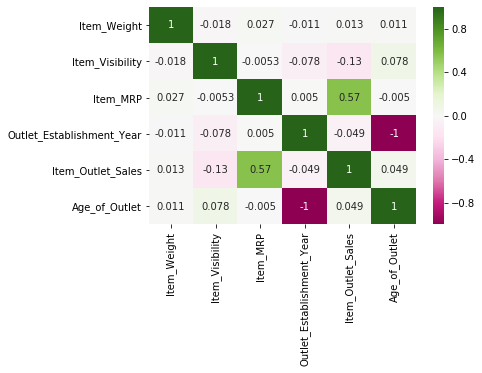

In [37]:
correlation=train_df.corr()
ax=sn.heatmap(correlation,annot=True,cmap="PiYG")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [38]:
train_df_new=train_df

In [39]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
train_df_new["Outlet"]=lab.fit_transform(train_df_new["Outlet_Identifier"])
train_df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Age_of_Outlet,Outlet
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14,9
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4,3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14,9
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15,0
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,11,7
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-consumable,9,6
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4,3


In [40]:
train_df_new["Type_of_Item"]=lab.fit_transform(train_df_new["Item_Type"])
train_df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Age_of_Outlet,Outlet,Type_of_Item
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14,9,4
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4,3,14
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14,9,10
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15,0,6
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,26,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26,1,13
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,11,7,0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-consumable,9,6,8
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4,3,13


In [41]:
train_df_new=pd.get_dummies(train_df_new,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_Item_Type"])
train_df_new

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Age_of_Outlet,Outlet,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-consumable
0,FDA15,9.300,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.920,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.500,0.016760,Meat,141.6180,OUT049,1999,2097.2700,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.200,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.930,0.066132,Household,53.8614,OUT013,1987,994.7052,26,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,Snack Foods,214.5218,OUT013,1987,2778.3834,26,1,...,0,0,1,0,1,0,0,0,1,0
8519,FDS36,8.380,0.046982,Baking Goods,108.1570,OUT045,2002,549.2850,11,7,...,0,1,0,0,1,0,0,0,1,0
8520,NCJ29,10.600,0.035186,Health and Hygiene,85.1224,OUT035,2004,1193.1136,9,6,...,0,1,0,0,1,0,0,0,0,1
8521,FDN46,7.210,0.145221,Snack Foods,103.1332,OUT018,2009,1845.5976,4,3,...,0,0,1,0,0,1,0,0,1,0


In [42]:
train_df_new.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Age_of_Outlet', 'Outlet', 'Type_of_Item',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'New_Item_Type_Drinks',
       'New_Item_Type_Food', 'New_Item_Type_Non-consumable'],
      dtype='object')

# Correlation plot

(23.0, 0.0)

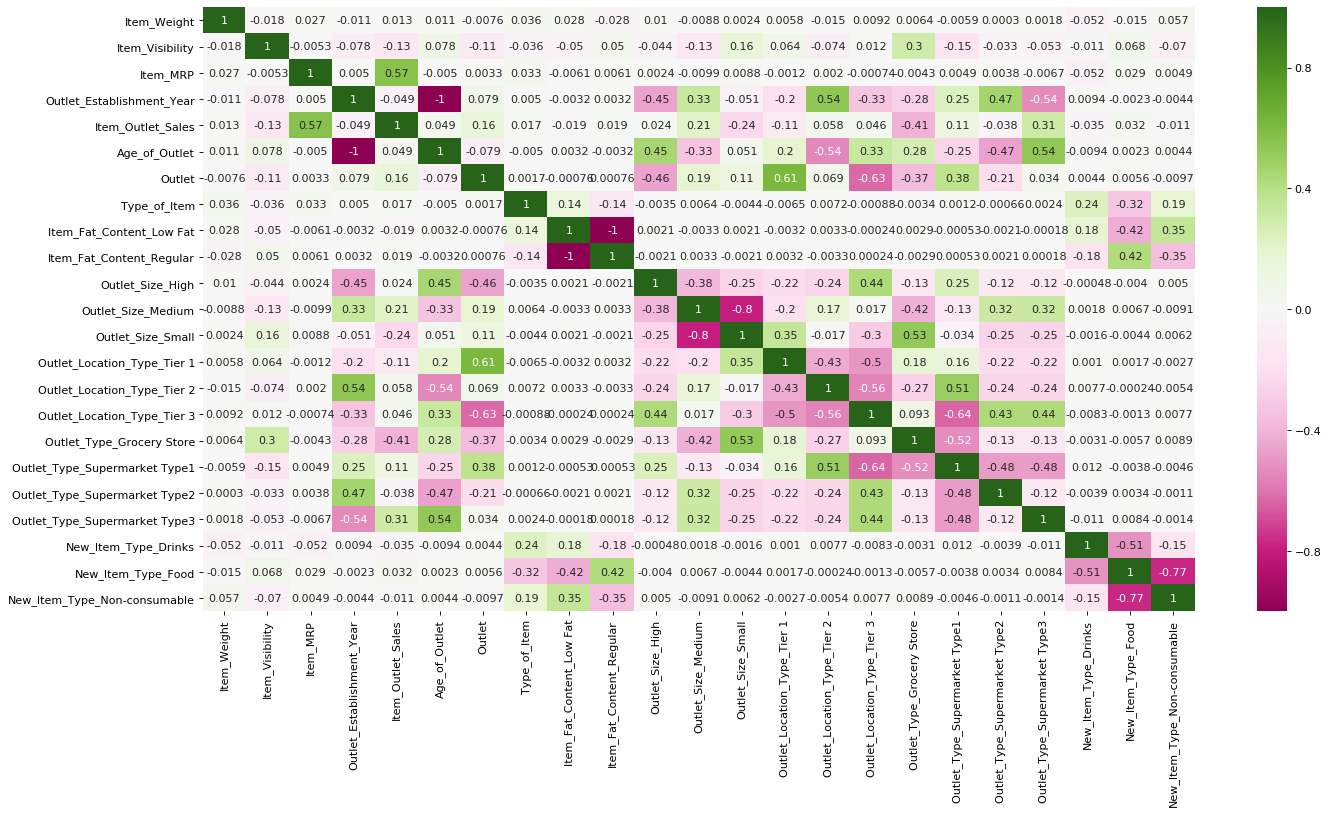

In [43]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)
correlation1=train_df_new.corr()
ax1=sn.heatmap(correlation1,annot=True,cmap="PiYG")
bottom,top=ax1.get_ylim()
ax1.set_ylim(bottom+0.5,top-0.5)

In [44]:
newone=train_df_new[['Item_MRP','New_Item_Type_Food','New_Item_Type_Drinks','Outlet_Type_Grocery Store','Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3','Item_Outlet_Sales']]


(8.0, 0.0)

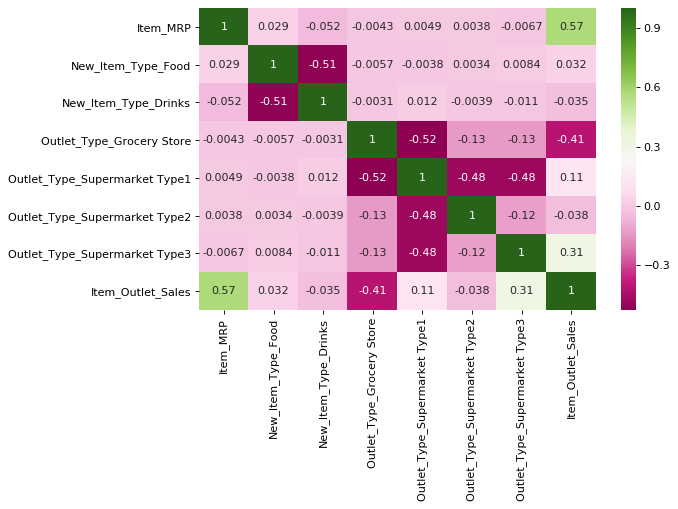

In [45]:
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=80)
correlation2=newone.corr()
ax1=sn.heatmap(correlation2,annot=True,cmap="PiYG")
bottom,top=ax1.get_ylim()
ax1.set_ylim(bottom+0.5,top-0.5)

In [46]:
x=train_df_new.drop(columns=["Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier","Item_Type","Item_Outlet_Sales"])

Saving  for future use

In [47]:
x_save=x

In [48]:
x=x.drop(columns=["Item_Fat_Content_Regular","Outlet_Size_Small","Outlet_Location_Type_Tier 3","Outlet_Type_Supermarket Type3","New_Item_Type_Non-consumable"])

In [49]:
x

,Item_Weight,Item_Visibility,Item_MRP,Age_of_Outlet,Outlet,Type_of_Item,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,New_Item_Type_Drinks,New_Item_Type_Food
0,9.300,0.016047,249.8092,14,9,4,1,0,1,1,0,0,1,0,0,1
1,5.920,0.019278,48.2692,4,3,14,0,0,1,0,0,0,0,1,1,0
2,17.500,0.016760,141.6180,14,9,10,1,0,1,1,0,0,1,0,0,1
3,19.200,0.066132,182.0950,15,0,6,0,0,0,0,0,1,0,0,0,1
4,8.930,0.066132,53.8614,26,1,9,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,1,13,1,1,0,0,0,0,1,0,0,1
8519,8.380,0.046982,108.1570,11,7,0,0,0,1,0,1,0,1,0,0,1
8520,10.600,0.035186,85.1224,9,6,8,1,0,0,0,1,0,1,0,0,0
8521,7.210,0.145221,103.1332,4,3,13,0,0,1,0,0,0,0,1,0,1


In [50]:
x.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Age_of_Outlet', 'Outlet',
       'Type_of_Item', 'Item_Fat_Content_Low Fat', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'New_Item_Type_Drinks', 'New_Item_Type_Food'],
      dtype='object')

In [51]:
len(x.columns)

16

In [52]:
y=train_df_new["Item_Outlet_Sales"]

In [53]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Doing log transformation to overcome heteroscedasticity

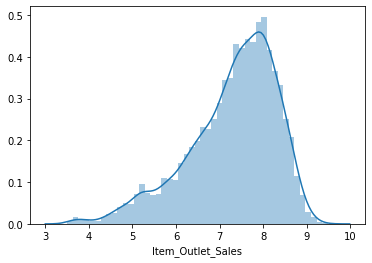

In [54]:
y_lg=np.log(y)
sn.distplot(y_lg)


## Modeling

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [56]:
model=LinearRegression()
model.fit(x,y_lg)
pred=model.predict(x)

In [57]:
pred

array([8.43654669, 6.56023868, 7.53886456, ..., 7.09035501, 7.02506717,
       6.93097435])

In [58]:
y_lg

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [59]:
# manual MSE
sum1=0
for i in range(len(pred)):
    sum1=sum1+(np.square(y_lg[i]-pred[i]))
sum1=sum1/8523
print(sum1)

0.2890027618235737


In [60]:
cv_score=cross_val_score(model,x,y_lg,scoring="neg_mean_squared_error",cv=5)
print("MSE: ",mean_squared_error(pred,y_lg))
cv_score=np.abs(np.mean(cv_score))
print("CV Score: ",cv_score)

MSE:  0.2890027618235741
CV Score:  0.2901341060089169


### Coeficient value

In [61]:
model.coef_

array([-4.81398972e-04, -4.57788574e-02,  8.29532618e-03, -3.53686551e-02,
        2.08619198e-02,  6.29877088e-04, -1.46777966e-02,  8.87287526e-01,
       -4.66511755e-02,  4.06578054e-01,  2.64413754e-01, -2.89830338e+00,
       -1.48475470e+00, -1.51688534e+00, -1.69072214e-02, -1.77120138e-04])

In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(y_lg, pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7206050198648577


# Doing same with statsmodel

In [63]:
import statsmodels.api as sm

In [64]:
xnew = sm.add_constant(x)
model11 = sm.OLS(y_lg,xnew)
results = model11.fit()
np.array(results.params)

C:\Users\vikrama\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


array([ 7.81407666e+00, -4.81398972e-04, -4.57788574e-02,  8.29532618e-03,
       -3.53686551e-02,  2.08619198e-02,  6.29877088e-04, -1.46777966e-02,
        8.87287526e-01, -4.66511755e-02,  4.06578054e-01,  2.64413754e-01,
       -2.89830338e+00, -1.48475470e+00, -1.51688534e+00, -1.69072214e-02,
       -1.77120138e-04])

In [65]:
model.coef_

array([-4.81398972e-04, -4.57788574e-02,  8.29532618e-03, -3.53686551e-02,
        2.08619198e-02,  6.29877088e-04, -1.46777966e-02,  8.87287526e-01,
       -4.66511755e-02,  4.06578054e-01,  2.64413754e-01, -2.89830338e+00,
       -1.48475470e+00, -1.51688534e+00, -1.69072214e-02, -1.77120138e-04])

In [66]:
model.intercept_

7.814076661404688

In [67]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1371.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:14:55   Log-Likelihood:                -6803.7
No. Observations:                8523   AIC:                         1.364e+04
Df Residuals:                    8506   BIC:                         1.376e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.8141      0.224     34.838      0.000       7.374       8.254
Item_Weight                      -0.0005      0.001     -0.383      0.702      -0.003       0.002
Item_Visibility                  -0.0458      0.126     -0.364      0.716      -0.293       0.201
Item_MRP                          0.0083   9.39e-05     88.358      0.000       0.008       0.008
Age_of_Outlet                    -0.0354      0.009     -4.007      0.000      -0.053      -0.018
Outlet                            0.0209      0.008      2.464      0.014       0.004       0.037
Type_of_Item                      0.0006      0.001      0.428      0.669      -0.002       0.004
Item_Fat_Content_Low Fat         -0.0147      0.013     -1.088      0.277      -0.041       0.012
Outlet_Size_High                  0.8873      0.237      3.743      0.000       0.423       1.352
Outlet_Size_Medium               -0.0467      0.018     -2.604      0.009      -0.082      -0.012
Outlet_Location_Type_Tier 1       0.4066      0.094      4.309      0.000       0.222       0.592
Outlet_Location_Type_Tier 2       0.2644      0.067      3.926      0.000       0.132       0.396
Outlet_Type_Grocery Store        -2.8983      0.096    -30.132      0.000      -3.087      -2.710
Outlet_Type_Supermarket Type1    -1.4848      0.233     -6.373      0.000      -1.941      -1.028
Outlet_Type_Supermarket Type2    -1.5169      0.199     -7.604      0.000      -1.908      -1.126
New_Item_Type_Drinks             -0.0169      0.024     -0.718      0.473      -0.063       0.029
New_Item_Type_Food               -0.0002      0.017     -0.010      0.992      -0.033       0.033
==============================================================================
Omnibus:                      824.060   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.108
Skew:                          -0.773   Prob(JB):                    2.45e-251
Kurtosis:                       3.929   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Finding VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
x.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Age_of_Outlet', 'Outlet',
       'Type_of_Item', 'Item_Fat_Content_Low Fat', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'New_Item_Type_Drinks', 'New_Item_Type_Food'],
      dtype='object')

In [70]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [71]:
vif_data

,feature,VIF
0,Item_Weight,8.666095
1,Item_Visibility,3.402598
2,Item_MRP,6.144469
3,Age_of_Outlet,29.904258
4,Outlet,27.702045
5,Type_of_Item,4.437617
6,Item_Fat_Content_Low Fat,3.454373
7,Outlet_Size_High,17.348527
8,Outlet_Size_Medium,4.036799
9,Outlet_Location_Type_Tier 1,11.337354


Dropping the Indep variable with highest VIF

In [72]:
x_vif_drop=x.drop(columns=["Outlet_Type_Supermarket Type1"])

In [73]:
model_vif_removed=LinearRegression()
model_vif_removed.fit(x_vif_drop,y_lg)
pred_vif_removed=model_vif_removed.predict(x_vif_drop)

In [74]:
cv_score_vif_removed=cross_val_score(model,x_vif_drop,y_lg,scoring="neg_mean_squared_error",cv=5)
print("MSE: ",mean_squared_error(pred_vif_removed,y_lg))
cv_score_vif_removed=np.abs(np.mean(cv_score_vif_removed))
print("CV Score: ",cv_score_vif_removed)

MSE:  0.29038276803509255
CV Score:  0.2914611453911142


In [75]:
from sklearn.metrics import r2_score
r2_vif_removed = r2_score(y_lg, pred_vif_removed)
print('r2 score for perfect model is', r2_vif_removed)

r2 score for perfect model is 0.7192708914100958


# Trying with one regressor

In [76]:
x1=train_df_new["Item_MRP"]
x1=np.array(x1)
x1=x1.reshape((8523,1))

In [77]:
y1=y
y1=np.array(y1)
y1=y1.reshape((8523,1))
y1.shape

(8523, 1)

In [78]:
model_with_one_regressor=LinearRegression()
model_with_one_regressor.fit(x1,y_lg)
pred1=model_with_one_regressor.predict(x1)

In [79]:
cv_score1=cross_val_score(model_with_one_regressor,x1,y_lg,scoring="neg_mean_squared_error",cv=5)
print("MSE: ",mean_squared_error(pred1,y_lg))
cv_score1=np.abs(np.mean(cv_score1))
print("CV Score: ",cv_score1)

MSE:  0.7656900885946635
CV Score:  0.7658989875036122


In [80]:
from sklearn.metrics import r2_score
r21 = r2_score(y_lg, pred1)
print('r2 score for perfect model is', r21)

r2 score for perfect model is 0.2597649733770432


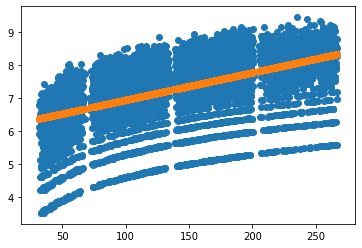

In [81]:
plt.scatter(x1,y_lg)
plt.scatter(x1,pred1)

# One regressor with stats model

In [82]:
x_onestats = sm.add_constant(x1)
model12 = sm.OLS(y_lg,x_onestats)
results1 = model12.fit()
np.array(results1.params)

array([6.12288607, 0.00832421])

In [83]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2990.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:15:56   Log-Likelihood:                -10956.
No. Observations:                8523   AIC:                         2.192e+04
Df Residuals:                    8521   BIC:                         2.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1229      0.023    260.958      0.000       6.077       6.169
x1             0.0083      0.000     54.683      0.000       0.008       0.009
==============================================================================
Omnibus:                     1471.079   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2369.555
Skew:                          -1.195   Prob(JB):                         0.00
Kurtosis:                       3.980   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# One regressor with Outlet

In [84]:
x2=train_df_new["Outlet"]
x2=np.array(x2)
x2=x2.reshape((8523,1))

In [85]:
x2

array([[9],
       [3],
       [9],
       ...,
       [6],
       [3],
       [8]])

In [86]:
x_2 = sm.add_constant(x2)
model3 = sm.OLS(y_lg,x_2)
results2 = model3.fit()
np.array(results2.params)

array([6.85243044, 0.09404562])

In [87]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     629.8
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          3.82e-134
Time:                        19:16:06   Log-Likelihood:                -11934.
No. Observations:                8523   AIC:                         2.387e+04
Df Residuals:                    8521   BIC:                         2.389e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8524      0.021    331.915      0.000       6.812       6.893
x1             0.0940      0.004     25.095      0.000       0.087       0.101
==============================================================================
Omnibus:                      561.683   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              676.553
Skew:                          -0.679   Prob(JB):                    1.23e-147
Kurtosis:                       3.247   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# One regressor with outlet size Medium

In [88]:
x3=train_df_new["Outlet_Size_Medium"]
x3=np.array(x3)
x3=x3.reshape((8523,1))

In [89]:
x_3 = sm.add_constant(x3)
model4 = sm.OLS(y_lg,x_3)
results3 = model4.fit()
np.array(results3.params)

array([6.96502814, 0.60789108])

In [90]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     828.1
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          7.07e-174
Time:                        19:16:21   Log-Likelihood:                -11842.
No. Observations:                8523   AIC:                         2.369e+04
Df Residuals:                    8521   BIC:                         2.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9650      0.016    446.484      0.000       6.934       6.996
x1             0.6079      0.021     28.777      0.000       0.566       0.649
==============================================================================
Omnibus:                      493.248   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.616
Skew:                          -0.635   Prob(JB):                    5.05e-127
Kurtosis:                       3.159   Cond. No.                         2.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# One regressor with Outlet_Grocery

In [91]:
x4=train_df_new["Outlet_Type_Grocery Store"]
x4=np.array(x4)
x4=x4.reshape((8523,1))
x_4 = sm.add_constant(x4)
model5 = sm.OLS(y_lg,x_4)
results4 = model5.fit()
np.array(results4.params)
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     6462.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:16:24   Log-Likelihood:                -9832.5
No. Observations:                8523   AIC:                         1.967e+04
Df Residuals:                    8521   BIC:                         1.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5514      0.009    849.136      0.000       7.534       7.569
x1            -2.0055      0.025    -80.388      0.000      -2.054      -1.957
==============================================================================
Omnibus:                      390.474   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.747
Skew:                          -0.551   Prob(JB):                     2.66e-97
Kurtosis:                       3.193   Cond. No.                         3.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# One regressor with Outlet_Type_Supermarket_Type3

In [92]:
x5=train_df_new["Outlet_Type_Supermarket Type3"]
x5=np.array(x5)
x5=x5.reshape((8523,1))
x_5 = sm.add_constant(x5)
model6 = sm.OLS(y_lg,x_5)
results5 = model6.fit()
print(np.array(results5.params))
results5.summary()

[7.20671165 0.81883329]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     575.9
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          3.33e-123
Time:                        19:16:26   Log-Likelihood:                -11959.
No. Observations:                8523   AIC:                         2.392e+04
Df Residuals:                    8521   BIC:                         2.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2067      0.011    637.690      0.000       7.185       7.229
x1             0.8188      0.034     23.998      0.000       0.752       0.886
==============================================================================
Omnibus:                      886.853   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1188.162
Skew:                          -0.872   Prob(JB):                    9.86e-259
Kurtosis:                       3.554   Cond. No.                         3.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# One regressor with Outlet_Size_Small

In [93]:
x6=train_df_new["Outlet_Size_Small"]
x6=np.array(x6)
x6=x6.reshape((8523,1))
x_6 = sm.add_constant(x6)
model7 = sm.OLS(y_lg,x_6)
results6 = model7.fit()
print(np.array(results6.params))
results6.summary()

[ 7.55658772 -0.75310383]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     1206.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          3.33e-247
Time:                        19:16:29   Log-Likelihood:                -11674.
No. Observations:                8523   AIC:                         2.335e+04
Df Residuals:                    8521   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5566      0.013    592.908      0.000       7.532       7.582
x1            -0.7531      0.022    -34.723      0.000      -0.796      -0.711
==============================================================================
Omnibus:                      353.617   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.442
Skew:                          -0.528   Prob(JB):                     3.02e-87
Kurtosis:                       3.079   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Two regressor with item mrp and outlet type grocery store

In [94]:
x10=train_df_new[["Item_MRP","Outlet_Type_Grocery Store"]]
x10=np.array(x10)
x10=x10.reshape((8523,2))
x_10 = sm.add_constant(x10)
model10 = sm.OLS(y_lg,x_10)
results10 = model10.fit()
print(np.array(results10.params))
results10.summary()

[ 6.38332627  0.00827849 -1.99887748]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     9403.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:16:31   Log-Likelihood:                -7271.2
No. Observations:                8523   AIC:                         1.455e+04
Df Residuals:                    8520   BIC:                         1.457e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3833      0.015    414.031      0.000       6.353       6.414
x1             0.0083   9.88e-05     83.789      0.000       0.008       0.008
x2            -1.9989      0.018   -108.203      0.000      -2.035      -1.963
==============================================================================
Omnibus:                      703.345   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              943.839
Skew:                          -0.703   Prob(JB):                    1.12e-205
Kurtosis:                       3.825   Cond. No.                         474.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Three regressor

In [95]:
x11=train_df_new[["Item_MRP","Outlet_Type_Grocery Store","Outlet"]]
x11=np.array(x11)
x11=x11.reshape((8523,3))
x_11 = sm.add_constant(x11)
model11 = sm.OLS(y_lg,x_11)
results11 = model11.fit()
print(np.array(results11.params))
results11.summary()

[ 6.34790674  0.00827794 -1.97688636  0.00692502]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     6277.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:16:37   Log-Likelihood:                -7266.8
No. Observations:                8523   AIC:                         1.454e+04
Df Residuals:                    8519   BIC:                         1.457e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3479      0.019    325.537      0.000       6.310       6.386
x1             0.0083   9.88e-05     83.821      0.000       0.008       0.008
x2            -1.9769      0.020    -99.344      0.000      -2.016      -1.938
x3             0.0069      0.002      2.964      0.003       0.002       0.012
==============================================================================
Omnibus:                      696.375   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.349
Skew:                          -0.700   Prob(JB):                    5.75e-203
Kurtosis:                       3.816   Cond. No.                         574.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Six regressor

In [96]:
x12=train_df_new[["Item_MRP","Outlet_Type_Grocery Store","Outlet","Outlet_Size_Medium","Outlet_Type_Supermarket Type3","Outlet_Size_Small"]]
x12=np.array(x12)
x12=x12.reshape((8523,6))
x_12 = sm.add_constant(x12)
model12 = sm.OLS(y_lg,x_12)
results12 = model12.fit()
print(np.array(results12.params))
results12.summary()

[ 6.29381009e+00  8.29460832e-03 -1.92912260e+00  8.25728287e-03
 -4.43741122e-02  5.75221454e-01  1.39701972e-03]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3605.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:16:44   Log-Likelihood:                -6850.3
No. Observations:                8523   AIC:                         1.371e+04
Df Residuals:                    8516   BIC:                         1.376e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2938      0.022    281.795      0.000       6.250       6.338
x1             0.0083   9.41e-05     88.172      0.000       0.008       0.008
x2            -1.9291      0.025    -76.793      0.000      -1.978      -1.880
x3             0.0083      0.003      2.921      0.003       0.003       0.014
x4            -0.0444      0.023     -1.915      0.056      -0.090       0.001
x5             0.5752      0.020     29.052      0.000       0.536       0.614
x6             0.0014      0.028      0.051      0.960      -0.053       0.055
==============================================================================
Omnibus:                      842.023   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.888
Skew:                          -0.780   Prob(JB):                    9.28e-260
Kurtosis:                       3.963   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Four regressor

In [97]:
x123=train_df_new[["Item_MRP","Outlet_Type_Grocery Store","Outlet_Type_Supermarket Type1","Outlet_Type_Supermarket Type2"]]
x123=np.array(x123)
x123=x123.reshape((8523,4))
x_123 = sm.add_constant(x123)
model123 = sm.OLS(y_lg,x_123)
results123 = model123.fit()
print(np.array(results123.params))
results123.summary()

[ 6.86507852  0.0083008  -2.48375954 -0.52874282 -0.70997478]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     5468.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:17:40   Log-Likelihood:                -6817.6
No. Observations:                8523   AIC:                         1.365e+04
Df Residuals:                    8518   BIC:                         1.368e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8651      0.022    312.742      0.000       6.822       6.908
x1             0.0083   9.37e-05     88.594      0.000       0.008       0.008
x2            -2.4838      0.024   -103.296      0.000      -2.531      -2.437
x3            -0.5287      0.019    -27.778      0.000      -0.566      -0.491
x4            -0.7100      0.025    -28.446      0.000      -0.759      -0.661
==============================================================================
Omnibus:                      830.223   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1167.050
Skew:                          -0.775   Prob(JB):                    3.79e-254
Kurtosis:                       3.940   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
x124=train_df_new[["Item_MRP","Outlet_Type_Grocery Store","Outlet_Type_Supermarket Type1","Outlet_Type_Supermarket Type3"]]
x124=np.array(x124)
x124=x124.reshape((8523,4))
x_124 = sm.add_constant(x124)
model124 = sm.OLS(y_lg,x_124)
results124 = model124.fit()
print(np.array(results124.params))
results124.summary()

[ 6.15510374  0.0083008  -1.77378477  0.18123196  0.70997478]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     5468.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:17:42   Log-Likelihood:                -6817.6
No. Observations:                8523   AIC:                         1.365e+04
Df Residuals:                    8518   BIC:                         1.368e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1551      0.022    278.390      0.000       6.112       6.198
x1             0.0083   9.37e-05     88.594      0.000       0.008       0.008
x2            -1.7738      0.024    -73.619      0.000      -1.821      -1.727
x3             0.1812      0.019      9.491      0.000       0.144       0.219
x4             0.7100      0.025     28.446      0.000       0.661       0.759
==============================================================================
Omnibus:                      830.223   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1167.050
Skew:                          -0.775   Prob(JB):                    3.79e-254
Kurtosis:                       3.940   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### This gives the best fit out of all

### Residual plot to show how we overcame heteroscedasticity

Text(0, 0.5, 'Outlet Sales')

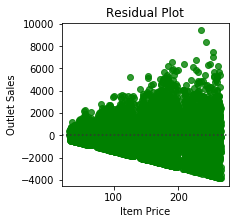

In [101]:
figure(figsize=(3,3))
sn.residplot(x=x1, y=y1, lowess=False, color="g")
plt.title('Residual Plot')
plt.xlabel('Item Price')
plt.ylabel('Outlet Sales')

The error is varying along x value

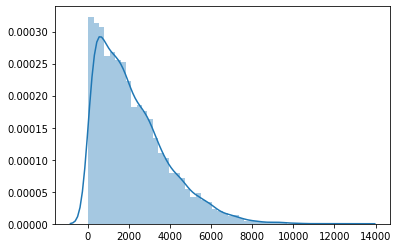

In [102]:
sn.distplot(y1)

### Log transform to overcome heteroscedasticity

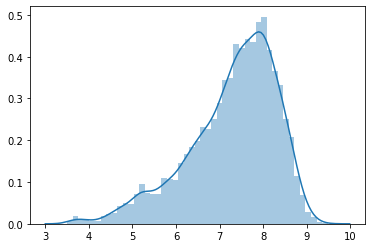

In [103]:
y1_log=np.log(y1)
sn.distplot(y1_log)


Text(0, 0.5, 'Outlet Sales')

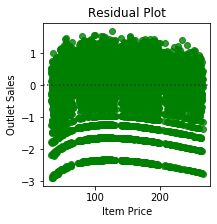

In [104]:
figure(figsize=(3,3))
sn.residplot(x=x1, y=y1_log, lowess=False, color="g")
plt.title('Residual Plot')
plt.xlabel('Item Price')
plt.ylabel('Outlet Sales')

In [105]:
y1_log

array([[8.22554004],
       [6.09452372],
       [7.64839178],
       ...,
       [7.08432164],
       [7.52055841],
       [6.64075127]])

In [106]:
np.exp(y1_log)

array([[3735.138 ],
       [ 443.4228],
       [2097.27  ],
       ...,
       [1193.1136],
       [1845.5976],
       [ 765.67  ]])

# Selecting best 4 feature using Select best 4

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [108]:
fs = SelectKBest(score_func=f_regression, k=4)

In [110]:
x_6_only = fs.fit_transform(x,y_lg)
x_6_only=pd.DataFrame(x_6_only)

In [111]:
x_6_only

,0,1,2,3
0,249.8092,1.0,0.0,1.0
1,48.2692,1.0,0.0,0.0
2,141.6180,1.0,0.0,1.0
3,182.0950,0.0,1.0,0.0
4,53.8614,0.0,0.0,1.0
...,...,...,...,...
8518,214.5218,0.0,0.0,1.0
8519,108.1570,1.0,0.0,1.0
8520,85.1224,0.0,0.0,1.0
8521,103.1332,1.0,0.0,0.0


In [112]:
model_with_6=LinearRegression()
model_with_6.fit(x_6_only,y_lg)
pred2=model_with_6.predict(x_6_only)

In [113]:
cv_score2=cross_val_score(model_with_6,x_6_only,y_lg,scoring="neg_mean_squared_error",cv=5)
print("MSE: ",mean_squared_error(pred2,y_lg))
cv_score2=np.abs(np.mean(cv_score2))
print("CV Score: ",cv_score2)

MSE:  0.3174859898374651
CV Score:  0.31789276394136545


In [114]:
from sklearn.metrics import r2_score
r31 = r2_score(y_lg, pred2)
print('r2 score for perfect model is', r31)

r2 score for perfect model is 0.6930687054195862


Thus we have to use all 16 features, selecting 6 best out of it is not improving r2

# Training model without log transform

In [115]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [116]:
x0=train_df_new[["Item_MRP","Outlet_Type_Grocery Store","Outlet_Type_Supermarket Type1","Outlet_Type_Supermarket Type2"]]

In [117]:
xcheck=train_df_new[["Item_MRP","Outlet_Type_Grocery Store","Outlet_Type_Supermarket Type1","Outlet_Type_Supermarket Type2"]]
xcheck=np.array(xcheck)
xcheck=xcheck.reshape((8523,4))
xcheck = sm.add_constant(xcheck)
modelcheck = sm.OLS(y,xcheck)
resultscheck = modelcheck.fit()
print(np.array(resultscheck.params))
resultscheck.summary()

[ 1518.49605395    15.56162112 -3361.88033181 -1399.83202105
 -1727.74653865]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2733.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:21:16   Log-Likelihood:                -72004.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8518   BIC:                         1.441e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1518.4961     46.036     32.985      0.000    1428.254    1608.738
x1            15.5616      0.196     79.196      0.000      15.176      15.947
x2         -3361.8803     50.427    -66.668      0.000   -3460.729   -3263.031
x3         -1399.8320     39.919    -35.067      0.000   -1478.084   -1321.580
x4         -1727.7465     52.343    -33.008      0.000   -1830.352   -1625.141
==============================================================================
Omnibus:                      960.815   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2293.652
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       5.163   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
model_wo_lg=LinearRegression()
model_wo_lg.fit(x0,y)
pred_wo_lg=model_wo_lg.predict(x0)

In [119]:
cv_score_wo_lg=cross_val_score(model_wo_lg,x0,y,scoring="neg_mean_squared_error",cv=5)
print("MSE: ",mean_squared_error(pred_wo_lg,y))
cv_score_wo_lg=np.abs(np.mean(cv_score_wo_lg))
print("CV Score: ",cv_score_wo_lg)

MSE:  1275230.3887680925
CV Score:  1277054.305022079


In [120]:
from sklearn.metrics import r2_score
r2_wo_lg = r2_score(y, pred_wo_lg)
print('r2 score for perfect model is', r2_wo_lg)

r2 score for perfect model is 0.5620472856555185


#### Thus log transform improved the fit

# Conclusion

Four best variables which gave best fit so far are
1. Item MRP
2. Grocery store
3. Supermarket Type 1
4. Supermarket Type 2

Adding further variable(Outlet size) doesn't imporve the fit subtancially. So as per occam's razor we conclude the model trained with above four variables gives the best fit.